# A base de dados

### Carregando o dataset

In [2]:
from google.colab import files
files.upload()

{}

In [3]:
import pandas as pd

dados = pd.read_csv('Iron_Ore_Price.csv')

### Conhecendo a base de dados

In [4]:
dados.head()

,Trens,Preço
0,8,105.0
1,15,123.0
2,18,161.0
3,15,168.0
4,28,208.0


In [5]:
dados.shape

(244, 2)

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Preço de Mercado do Minério')

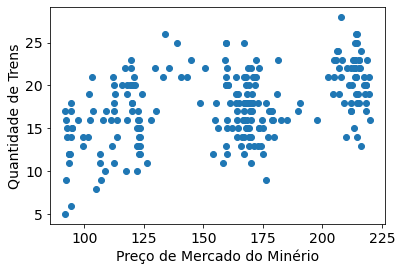

In [7]:
plt.rcParams.update({'font.size': 14})
plt.scatter(dados['Preço'],dados['Trens'])
plt.ylabel('Quantidade de Trens')
plt.xlabel('Preço de Mercado do Minério')

### Normalizando a base de dados

In [8]:
import numpy as np

In [9]:
y = dados['Trens'].values

In [20]:
X = dados[['Preço','Preço']].values
print(X)

[[105.   105.  ]
 [123.   123.  ]
 [161.   161.  ]
 [168.   168.  ]
 [208.   208.  ]
 [101.49 101.49]
 [101.82 101.82]
 [102.58 102.58]
 [103.17 103.17]
 [103.74 103.74]
 [106.49 106.49]
 [106.77 106.77]
 [107.04 107.04]
 [108.04 108.04]
 [108.51 108.51]
 [109.22 109.22]
 [111.19 111.19]
 [111.64 111.64]
 [112.24 112.24]
 [112.29 112.29]
 [112.34 112.34]
 [112.5  112.5 ]
 [112.54 112.54]
 [112.99 112.99]
 [113.64 113.64]
 [113.79 113.79]
 [115.76 115.76]
 [117.01 117.01]
 [117.68 117.68]
 [117.76 117.76]
 [117.85 117.85]
 [118.1  118.1 ]
 [119.01 119.01]
 [119.65 119.65]
 [119.7  119.7 ]
 [119.89 119.89]
 [119.96 119.96]
 [120.1  120.1 ]
 [120.23 120.23]
 [120.45 120.45]
 [120.73 120.73]
 [121.23 121.23]
 [121.94 121.94]
 [122.06 122.06]
 [122.29 122.29]
 [122.36 122.36]
 [122.47 122.47]
 [122.5  122.5 ]
 [122.83 122.83]
 [122.86 122.86]
 [122.89 122.89]
 [123.19 123.19]
 [123.3  123.3 ]
 [123.4  123.4 ]
 [123.49 123.49]
 [124.16 124.16]
 [126.42 126.42]
 [128.11 128.11]
 [129.66 129.6

In [21]:
X = X/np.amax(X,axis=0)
print(X)

[[0.47777222 0.47777222]
 [0.55967602 0.55967602]
 [0.73258407 0.73258407]
 [0.76443555 0.76443555]
 [0.94644401 0.94644401]
 [0.46180097 0.46180097]
 [0.46330254 0.46330254]
 [0.4667607  0.4667607 ]
 [0.46944533 0.46944533]
 [0.47203895 0.47203895]
 [0.48455203 0.48455203]
 [0.48582609 0.48582609]
 [0.48705465 0.48705465]
 [0.49160486 0.49160486]
 [0.49374346 0.49374346]
 [0.49697411 0.49697411]
 [0.50593803 0.50593803]
 [0.50798562 0.50798562]
 [0.51071575 0.51071575]
 [0.51094326 0.51094326]
 [0.51117077 0.51117077]
 [0.5118988  0.5118988 ]
 [0.51208081 0.51208081]
 [0.51412841 0.51412841]
 [0.51708604 0.51708604]
 [0.51776858 0.51776858]
 [0.52673249 0.52673249]
 [0.53242026 0.53242026]
 [0.5354689  0.5354689 ]
 [0.53583292 0.53583292]
 [0.53624244 0.53624244]
 [0.53737999 0.53737999]
 [0.54152068 0.54152068]
 [0.54443282 0.54443282]
 [0.54466033 0.54466033]
 [0.54552487 0.54552487]
 [0.54584338 0.54584338]
 [0.54648041 0.54648041]
 [0.54707194 0.54707194]
 [0.54807299 0.54807299]


In [22]:
ymax=np.amax(y)
y = y/ymax
print(y[0:10])

[0.28571429 0.53571429 0.64285714 0.53571429 1.         0.5
 0.67857143 0.57142857 0.75       0.60714286]


### Funções de ativação

In [23]:
def sigmoid(Soma):
    return 1/(1+np.exp(-Soma))

def relu(Soma):
    return np.maximum(0,Soma)

### Criando a estrutura da rede

In [24]:
arquitetura = [
    {"dim_entrada": 2, "dim_saida": 50, "ativacao": "relu"},
    {"dim_entrada": 50, "dim_saida": 1, "ativacao": "sigmoid"},
]

### Pesos e viés

In [25]:
def inicia_camadas(arquitetura, seed = 99):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

### Propagação da rede

In [26]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual
    
    # selecção da função de ativação
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [27]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salca os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

### Testando a rede

In [29]:
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [30]:
y_estimado[0,0]*ymax

0.5263943787184663

In [31]:
y[0]*ymax

0.2857142857142857

### Atualização dos pesos

In [32]:
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

    return valores_parametros;

### Função de custo

In [33]:
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)

### Retropropagação

In [34]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # numero de exemplos
    #m = Y.shape[1]
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        b_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes

In [35]:
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [36]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao is "relu":
        func_ativacao_retro = relu_retro
    elif ativacao is "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

### Treinamento

In [37]:
def treino(X, Y,X_teste,Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
   
    
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede - Foward propagation
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        
        Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
        historia_custo_teste.append(custo_teste)
        
        
        # Retropropagação - Backpropagation
        gradientes = retropropagacao_total(Y_predito, Y, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 50 == 0):
            
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))
            
            
    return valores_parametros, historia_custo, historia_custo_teste

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.43, random_state=42)

In [40]:
# Treinamento
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))), 
                                                                  np.transpose(X_teste), np.transpose(y_teste.reshape((y_teste.shape[0], 1))), 
                                                                  arquitetura, 20000, 0.01)

Iteração: 00000 - custo: 0.68837 
Iteração: 00050 - custo: 0.67174 
Iteração: 00100 - custo: 0.66255 
Iteração: 00150 - custo: 0.65743 
Iteração: 00200 - custo: 0.65459 
Iteração: 00250 - custo: 0.65303 
Iteração: 00300 - custo: 0.65218 
Iteração: 00350 - custo: 0.65171 
Iteração: 00400 - custo: 0.65144 
Iteração: 00450 - custo: 0.65128 
Iteração: 00500 - custo: 0.65117 
Iteração: 00550 - custo: 0.65109 
Iteração: 00600 - custo: 0.65104 
Iteração: 00650 - custo: 0.65099 
Iteração: 00700 - custo: 0.65096 
Iteração: 00750 - custo: 0.65091 
Iteração: 00800 - custo: 0.65086 
Iteração: 00850 - custo: 0.65082 
Iteração: 00900 - custo: 0.65078 
Iteração: 00950 - custo: 0.65075 
Iteração: 01000 - custo: 0.65072 
Iteração: 01050 - custo: 0.65069 
Iteração: 01100 - custo: 0.65066 
Iteração: 01150 - custo: 0.65063 
Iteração: 01200 - custo: 0.65060 
Iteração: 01250 - custo: 0.65058 
Iteração: 01300 - custo: 0.65055 
Iteração: 01350 - custo: 0.65052 
Iteração: 01400 - custo: 0.65049 
Iteração: 0145

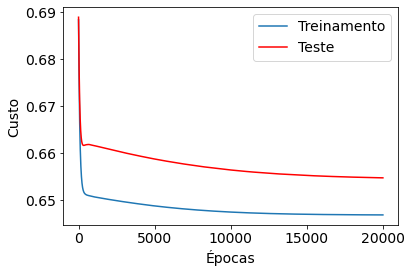

In [41]:
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento','Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

### Fazendo Previsões

In [42]:
# Previsão
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

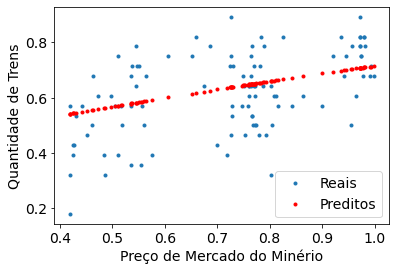

In [44]:
plt.plot(np.transpose(X_teste)[1],ymax*y_teste,'.')
plt.plot(np.transpose(X_teste)[1],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('Quantidade de Trens')
plt.xlabel('Preço de Mercado do Minério')
plt.show()

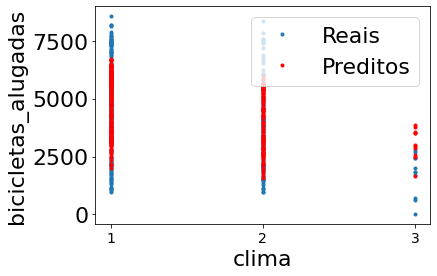

In [ ]:
plt.plot(3*np.transpose(X_teste)[0],ymax*y_teste,'.')
plt.plot(3*np.transpose(X_teste)[0],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()